<a href="https://colab.research.google.com/github/Gpraveenbabu/Projects/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: invalid option -- '~'
Try 'mkdir --help' for more information.


In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
data='/content/face-mask-dataset.zip'
with ZipFile(data,'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask=os.listdir('/content/data/with_mask')
without_mask=os.listdir('/content/data/without_mask')
print(with_mask[:5])
print(without_mask[:5])
print('Number of Images with mask',len(with_mask))
print('Number of Images without mask',len(without_mask))

['with_mask_2637.jpg', 'with_mask_884.jpg', 'with_mask_2522.jpg', 'with_mask_1111.jpg', 'with_mask_1797.jpg']
['without_mask_3339.jpg', 'without_mask_1918.jpg', 'without_mask_3360.jpg', 'without_mask_1334.jpg', 'without_mask_3068.jpg']
Number of Images with mask 3725
Number of Images without mask 3828


In [ ]:
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])
print(len(with_mask_labels))
print(len(without_mask_labels))

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
3725
3828


In [ ]:
labels=with_mask_labels+without_mask_labels
print(len(labels))


7553


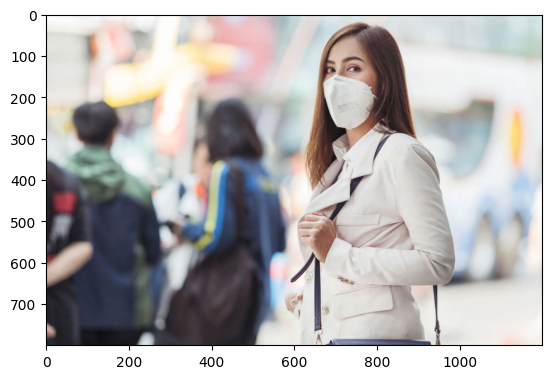

In [ ]:
#Having Mask
img=mpimg.imread('/content/data/with_mask/with_mask_3478.jpg')
imgplot=plt.imshow(img)
plt.show()

In [ ]:
#Not Having Mask
img=mpimg.imread('/content/data/without_mask/without_mask_789.jpg')
imgplot=plt.imshow(img)
plt.show()

NameError: name 'mpimg' is not defined

In [ ]:
#converting images to numpy array
with_mask_path='/content/data/with_mask'
data=[]
for img_file in with_mask:
  image=Image.open(with_mask_path+'/'+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

without_mask_path='/content/data/without_mask'

for img_file in without_mask:
  image=Image.open(without_mask_path+'/'+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)
len(data)
type(data[0])
data[0].shape

NameError: name 'data' is not defined

In [ ]:
#converting image list and label list to numpy array
x=np.array(data)
y=np.array(labels)
type(x)
type(y)
print(x.shape)
print(y.shape)
print(y)

NameError: name 'np' is not defined

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x.shape)
print(X_train.shape)
print(X_test.shape)
X_train_scaled=X_train/255
X_test_scaled=X_test/255
X_train_scaled[0]

NameError: name 'train_test_split' is not defined

In [ ]:
import tensorflow as tf
from tensorflow import keras
num_of_classes=2
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
#now running the neural network
history=model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=5)

NameError: name 'X_train_scaled' is not defined

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
done
['with_mask_2637.jpg', 'with_mask_884.jpg', 'with_mask_2522.jpg', 'with_mask_1111.jpg', 'with_mask_1797.jpg']
['without_mask_3339.jpg', 'without_mask_1918.jpg', 'without_mask_3360.jpg', 'without_mask_1334.jpg', 'without_mask_3068.jpg']
Number of Images with mask: 3725
Number of Images without mask: 3828
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
7553


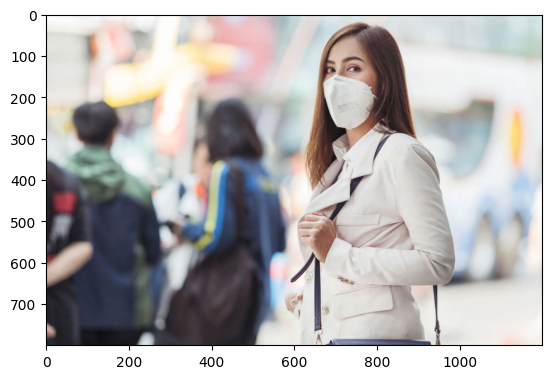

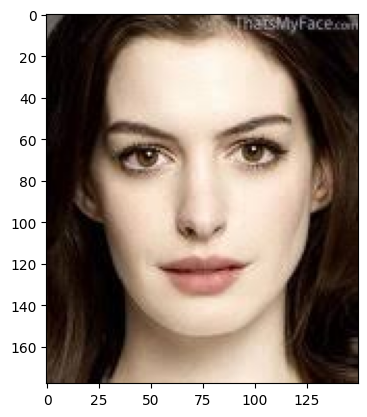

(7553, 128, 128, 3)
(7553,)
(6042, 128, 128, 3)
(1511, 128, 128, 3)
Epoch 1/5
 42/170 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.5441 - loss: 4.6858

KeyboardInterrupt: 

In [ ]:
# Installing and setting up Kaggle
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d omkargurav/face-mask-dataset

# Unzipping the dataset
from zipfile import ZipFile
data = '/content/face-mask-dataset.zip'
with ZipFile(data, 'r') as zip:
    zip.extractall()
    print('done')

# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

# Listing images in the dataset
with_mask = os.listdir('/content/data/with_mask')
without_mask = os.listdir('/content/data/without_mask')
print(with_mask[:5])
print(without_mask[:5])

print('Number of Images with mask:', len(with_mask))
print('Number of Images without mask:', len(without_mask))

# Creating labels for the images
with_mask_labels = [1] * 3725
without_mask_labels = [0] * 3828
print(with_mask_labels[:5])
print(without_mask_labels[:5])

labels = with_mask_labels + without_mask_labels
print(len(labels))

# Displaying sample images
img = mpimg.imread('/content/data/with_mask/with_mask_3478.jpg')
imgplot = plt.imshow(img)
plt.show()

img = mpimg.imread('/content/data/without_mask/without_mask_789.jpg')
imgplot = plt.imshow(img)
plt.show()

# Converting images to numpy arrays
data = []
with_mask_path = '/content/data/with_mask'
for img_file in with_mask:
    image = Image.open(with_mask_path + '/' + img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

without_mask_path = '/content/data/without_mask'
for img_file in without_mask:
    image = Image.open(without_mask_path + '/' + img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Converting lists to numpy arrays
x = np.array(data)
y = np.array(labels)

print(x.shape)
print(y.shape)

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

# Scaling the data
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

# Building the CNN model
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

# Training the model
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy:', accuracy)

# Plotting the loss and accuracy
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(history.history['acc'], label='train accuracy')
plt.plot(history.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

# Predictive system
input_image_path = input('Path of the image to be predicted:')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized / 255.0
image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])
input_prediction = model.predict(image_reshaped)
input_pred_label = [np.argmax(input_prediction)]
print(input_pred_label)

if input_pred_label[0] == 1:
    print('Person in the image was not wearing the mask')
else:
    print('Person in the image was wearing the mask')


In [ ]:
loss,accuracy=model.evaluate(X_test_scaled,Y_test)
print('Test Accuracy',accuracy)
h=history

#plot of loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()


#plot of accuracy value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()



In [ ]:
#predictive system
input_image_path=input('Path of the image to be predicted')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resized/255
image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])
input_prediction=model.predict(image_reshaped)
print(input_prediction)
input_pred_label=[np.argmax(input_prediction)]
print(input_pred_label)
if input_pred_label==1:
  print('Person in the image was not wearing the mask')
else:
  print('Person in the image was wearing the mask')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
